In [1]:
import pandas as pd

apt_price = pd.read_csv(
    '../20220906 - 기술통계, 결측치 처리, 그룹핑/apt_price_2022.csv',
    encoding='cp949',
    skiprows=15,
    thousands=','
)

apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,해제사유발생일,거래유형,중개사소재지
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,1987.0,언주로 3,NaN,-,-
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,1987.0,언주로 3,NaN,중개거래,서울 강남구
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,1987.0,언주로 3,NaN,중개거래,서울 강남구
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,1987.0,언주로 3,NaN,중개거래,서울 강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16994,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16995,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,1997.0,동일로 752,NaN,중개거래,서울 중랑구
16996,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,2003.0,동일로144길 74,NaN,중개거래,"서울 송파구, 서울 중랑구"
16997,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,2003.0,동일로144길 74,NaN,중개거래,서울 중랑구


In [2]:
# apt_price["시군구"] 를 시,구,동으로 분할
apt_price["구"] = apt_price["시군구"].str.split().str[1]
apt_price["동"] = apt_price["시군구"].str.split().str[2]
apt_price.head()
# 전용면적을 평 변환
apt_price["평"] = round(apt_price["전용면적(㎡)"] / 3.03, 1)
# 거래금액 단위를 억원으로 변환
apt_price["거래금액_억원"] = apt_price["거래금액(만원)"] / 10000
# 계약년월 -> 계약년, 계약월로 분리
apt_price["계약년"] = apt_price["계약년월"] // 100 
apt_price["계약월"] = apt_price["계약년월"] % 100 
apt_price.head()

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,도로명,해제사유발생일,거래유형,중개사소재지,구,동,평,거래금액_억원,계약년,계약월
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,...,언주로 3,NaN,-,-,강남구,개포동,26.4,22.0,2021,9
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,21.5,2021,12
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,22.0,2022,4
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,22.0,2022,4
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,...,언주로 3,NaN,중개거래,서울 강남구,강남구,개포동,26.4,21.6,2022,5


In [3]:

# 평정보를 이용하여 평형정보 생성
# 10평이하,10평대,20평대,30평대,40평대,40평이상
apt_price["평형"] = pd.cut(
    apt_price["평"],
    bins=[0,10,20,30,40,50,1000],
    labels="10평이하,10평대,20평대,30평대,40평대,40평이상".split(",")
)

In [4]:
# 요일 추출
apt_price["계약요일"] = pd.to_datetime(
    apt_price["계약년월"].astype(str) + apt_price["계약일"].astype(str),
    format="%Y%m%d"
).dt.dayofweek

In [5]:
apt_price

,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,...,거래유형,중개사소재지,구,동,평,거래금액_억원,계약년,계약월,평형,계약요일
0,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202109,2,220000,2,...,-,-,강남구,개포동,26.4,22.00,2021,9,20평대,3
1,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202112,4,215000,3,...,중개거래,서울 강남구,강남구,개포동,26.4,21.50,2021,12,20평대,5
2,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,12,220000,4,...,중개거래,서울 강남구,강남구,개포동,26.4,22.00,2022,4,20평대,1
3,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202204,21,220000,2,...,중개거래,서울 강남구,강남구,개포동,26.4,22.00,2022,4,20평대,3
4,서울특별시 강남구 개포동,658-1,658.0,1.0,개포6차우성아파트1동~8동,79.97,202205,27,216000,2,...,중개거래,서울 강남구,강남구,개포동,26.4,21.60,2022,5,20평대,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16994,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),59.76,202207,20,74000,3,...,중개거래,서울 중랑구,중랑구,중화동,19.7,7.40,2022,7,10평대,2
16995,서울특별시 중랑구 중화동,450,450.0,0.0,한신아파트(103~109),84.03,202207,27,91500,12,...,중개거래,서울 중랑구,중랑구,중화동,27.7,9.15,2022,7,20평대,2
16996,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202111,4,50000,2,...,중개거래,"서울 송파구, 서울 중랑구",중랑구,중화동,28.0,5.00,2021,11,20평대,3
16997,서울특별시 중랑구 중화동,274-51,274.0,51.0,한영(101),84.69,202204,9,49900,7,...,중개거래,서울 중랑구,중랑구,중화동,28.0,4.99,2022,4,20평대,5


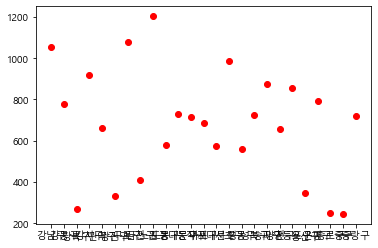

In [9]:
import matplotlib.pyplot as plt
plt.rc("font",family="Malgun Gothic")
# 구별 계약건수
구별계약건수 = apt_price.groupby("구")[["층"]].count()
plt.plot(
    구별계약건수.index,
    구별계약건수["층"],
    "ro"
)

Text(0, 0.5, '계약건수')

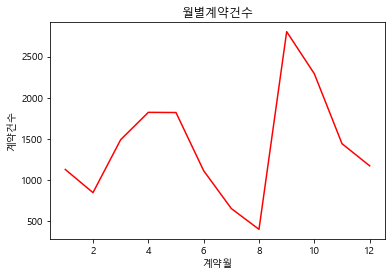

In [15]:

월별계약건수 = apt_price.groupby('계약월')[['층']].count()
plt.plot(
    월별계약건수.index,
    월별계약건수['층'],
    'r-'
)

plt.title('월별계약건수')
plt.xlabel('계약월')
plt.ylabel('계약건수')

(0.5, 30.0)

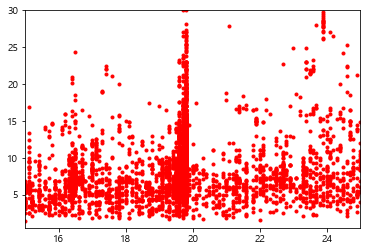

In [18]:
# 전용면적별 거래금액
plt.plot(
    apt_price['평'],
    apt_price['거래금액_억원'],
    'r.'
)

plt.xlim(15, 25)

plt.ylim(0.5, 30)

Text(0, 0.5, '계약건수')

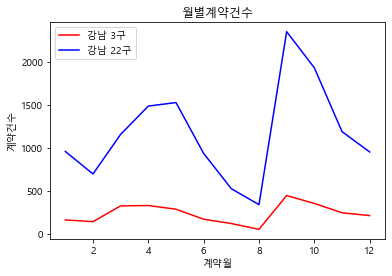

In [19]:
cond = apt_price['구'].isin(['강남구', '서초구', '송파구'])
월별계약건수_3구 = apt_price[cond].groupby('계약월')[['층']].count()
월별계약건수_22구 = apt_price[~cond].groupby('계약월')[['층']].count()

plt.plot(
    월별계약건수_3구.index,
    월별계약건수_3구['층'],
    'r-',
    label='강남 3구'
)

plt.plot(
    월별계약건수_22구.index,
    월별계약건수_22구['층'],
    'b-',
    label='강남 22구'
)

plt.legend() # 색깔을 설명하는 범례 표시
plt.title('월별계약건수')
plt.xlabel('계약월')
plt.ylabel('계약건수')